In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## 損失関数とトレーニング誤差・テスト誤差

In [2]:
# パラメータの範囲
par = np.linspace(-3, 3, 50)
# テスト誤差
te_err = (1 + par**2) / 2

In [3]:
te_err

array([5.        , 4.64014994, 4.29529363, 3.96543107, 3.65056227,
       3.35068721, 3.06580591, 2.79591837, 2.54102457, 2.30112453,
       2.07621824, 1.86630571, 1.67138692, 1.49146189, 1.32653061,
       1.17659309, 1.04164931, 0.92169929, 0.81674302, 0.72678051,
       0.65181175, 0.59183673, 0.54685548, 0.51686797, 0.50187422,
       0.50187422, 0.51686797, 0.54685548, 0.59183673, 0.65181175,
       0.72678051, 0.81674302, 0.92169929, 1.04164931, 1.17659309,
       1.32653061, 1.49146189, 1.67138692, 1.86630571, 2.07621824,
       2.30112453, 2.54102457, 2.79591837, 3.06580591, 3.35068721,
       3.65056227, 3.96543107, 4.29529363, 4.64014994, 5.        ])

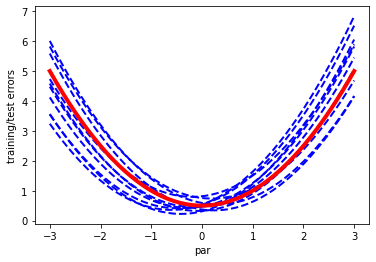

In [4]:
# テスト誤差をプロット
for i in range(10):
    # データを生成
    z = np.random.normal(size=20)
    # トレーニング誤差
    trerr = np.mean(np.subtract.outer(z, par)**2 / 2, axis=0)
    # トレーニング誤差をプロット
    plt.plot(par, trerr, 'b--', linewidth=2)
    
plt.xlabel("par")
plt.ylabel("training/test errors")
plt.plot(par, te_err, 'r-', linewidth=4)
plt.show()

# テスト誤差の推定：交差検証法

In [5]:
from sklearn.tree import DecisionTreeRegressor
# 設定：データ数100、10重CV
n, K = 100, 10
# データ生成
# 区間[-2, 2]上の一様分布
x = np.random.uniform(-2, 2, n)
y = np.sin(2*np.pi*x) / x + np.random.normal(scale=0.5, size=n)
# データグループ分け
cv_idx = np.tile(np.arange(K), int(np.ceil(n/K)))[:n]
# 決定木の深さの候補
maxdepth = np.arange(2, 10)
cverr = np.array([])
for mp in maxdepth:
    cverr_lambda = np.array([])
    for k in range(K):
        tr_idx = (cv_idx!=k)
        te_idx = (cv_idx==k)
        # CVのためのデータを分割
        cvx = x[tr_idx]
        cvy = y[tr_idx]
        dtreg = DecisionTreeRegressor(max_depth=mp)
        # 決定木で推定
        dtreg.fit(np.array([cvx]).T, cvy)
        # 予測
        ypred = dtreg.predict(np.array([x[te_idx]]).T)
        # CV誤差の計算
        cl = np.append(cverr_lambda, np.mean(y[te_idx] - ypred)**2 / 2)
    cverr = np.append(cverr, np.mean(cl))

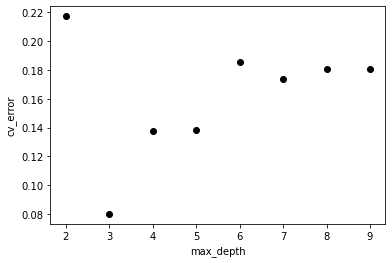

In [6]:
plt.scatter(maxdepth, cverr, c='k')
plt.xlabel("max_depth")
plt.ylabel("cv_error")
plt.show()

# ROC曲線とAUC

In [7]:
n = 100
xp = np.random.normal(loc=1, size=n*2).reshape(n, 2)
xn = np.random.normal(size=n*2).reshape(n, 2)

In [8]:
# F1のAUC
np.mean(np.subtract.outer(xp[:, 0], xn[:, 0]) >= 0)

0.7364

In [9]:
# F2のAUC
np.mean(np.subtract.outer(np.sum(xp, 1), np.sum(xn, 1)) >= 0)

0.8306

In [10]:
n = 10000
xp = np.random.normal(loc=1, size=n*2).reshape(n, 2)
xn = np.random.normal(size=n*2).reshape(n, 2)

In [11]:
# F1のAUC
np.mean(np.subtract.outer(xp[:, 0], xn[:, 0]) >= 0)

0.76416402

In [12]:
# F2のAUC
np.mean(np.subtract.outer(np.sum(xp, 1), np.sum(xn, 1)) >= 0)

0.84320952

In [13]:
# F1のAUC
def fpr(c):
    return (1-sp.stats.norm.cdf(c))

def tpr(c):
    return (1-sp.stats.norm.cdf(c, loc=1))

c = np.arange(-10, 10, 0.01)
sp.integrate.cumtrapz(tpr(c)[::-1], fpr(c)[::-1])[-1]

0.7602481081209274

In [14]:
def fpr(c):
    return (1-sp.stats.norm.cdf(c, scale=np.sqrt(2)))
def tpr(c):
    return (1-sp.stats.norm.cdf(c, loc=2, scale=np.sqrt(2)))

sp.integrate.cumtrapz(tpr(c)[::-1], fpr(c)[::-1])[-1]

0.8413437378589432